In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\PID\PID_C_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,NaN
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,NaN,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	40
float64		column 2	31
float64		column 3	44
float64		column 4	31
float64		column 5	38
float64		column 6	48
float64		column 7	42
float64		column 8	33


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,728.000000,737.000000,724.000000,737.000000,730.000000,720.000000,726.000000,735.000000
mean,3.880495,121.054274,68.961326,20.503392,77.126027,32.104306,0.476884,33.461224
std,3.394834,31.823943,19.581899,15.923571,111.676465,7.633696,0.335607,11.891691
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.375000,0.244000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,15.500000,32.050000,0.381500,29.000000
75%,6.000000,141.000000,80.000000,32.000000,124.250000,36.525000,0.628500,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


<AxesSubplot:>

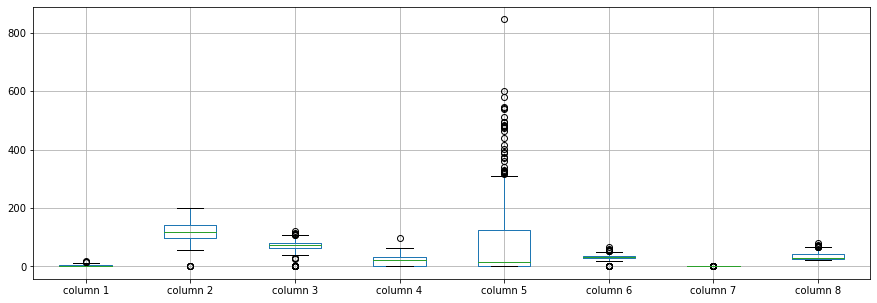

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      3.880495
column 2    121.054274
column 3     68.961326
column 4     20.503392
column 5     77.126027
column 6     32.104306
column 7      0.476884
column 8     33.461224
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.123875,0.141098,-0.094887,-0.055108,0.035277,-0.044034,0.548511
column 2,0.123875,1.000000,0.157124,0.064747,0.318554,0.218439,0.127464,0.270152
column 3,0.141098,0.157124,1.000000,0.206470,0.082034,0.281201,0.034238,0.242245
column 4,-0.094887,0.064747,0.206470,1.000000,0.439209,0.399508,0.196551,-0.125804
column 5,-0.055108,0.318554,0.082034,0.439209,1.000000,0.193514,0.135104,-0.033168
column 6,0.035277,0.218439,0.281201,0.399508,0.193514,1.000000,0.160634,0.036167
column 7,-0.044034,0.127464,0.034238,0.196551,0.135104,0.160634,1.000000,0.043157
column 8,0.548511,0.270152,0.242245,-0.125804,-0.033168,0.036167,0.043157,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+65,8+65+65,8+65+65+65,8+65+65+65+65,8+65+65+65,8+65+65,8+65,8], vae_layer = False, seed = 65)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 404.29380798339844
Epoch: 1 , loss: 404.69426918029785
Epoch: 2 , loss: 404.6978651682536
Epoch: 3 , loss: 403.71961720784503
Epoch: 4 , loss: 401.93503697713214
Epoch: 5 , loss: 388.7070477803548
Epoch: 6 , loss: 365.9223213195801
Epoch: 7 , loss: 351.2655220031738
Epoch: 8 , loss: 342.17732938130695
Epoch: 9 , loss: 337.46686395009357
Epoch: 10 , loss: 323.703652381897
Epoch: 11 , loss: 318.444312731425
Epoch: 12 , loss: 309.28826745351154
Epoch: 13 , loss: 310.9369840621948
Epoch: 14 , loss: 299.69846534729004
Epoch: 15 , loss: 304.514586130778
Epoch: 16 , loss: 288.61412080128986
Epoch: 17 , loss: 292.30896790822345
Epoch: 18 , loss: 290.1019535064697
Epoch: 19 , loss: 286.5509099960327
Epoch: 20 , loss: 286.4709815979004
Epoch: 21 , loss: 279.76024595896405
Epoch: 22 , loss: 281.1458911895752
Epoch: 23 , loss: 284.9267218907674
Epoch: 24 , loss: 285.3622881571452
Epoch: 25 , loss: 274.9360186258952

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(768, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     8.000
column 2    99.000
column 3    84.000
column 4     0.000
column 5     0.000
column 6    35.400
column 7     0.388
column 8    50.000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\PID.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-2.407175
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...
763,0.0,0.0,0.0,-23.234941,0.0,0.0,0.0,0.000000
764,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
765,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
766,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1256.107778180786, 5776.576248839705)

In [17]:
NRMS=numerator/denominator
NRMS


0.21744848922111787

In [18]:
new_df.iloc[66,:]

column 1      0.000
column 2    109.000
column 3     88.000
column 4     30.000
column 5      0.000
column 6     32.500
column 7      0.855
column 8     38.000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148.0,72.0,35.000000,0.0,33.6,0.627,50.000000
1,1.0,85.0,66.0,29.000000,0.0,26.6,0.351,31.000000
2,8.0,183.0,64.0,0.000000,0.0,23.3,0.672,29.592825
3,1.0,89.0,66.0,23.000000,94.0,28.1,0.167,21.000000
4,0.0,137.0,40.0,35.000000,168.0,43.1,2.288,33.000000
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,24.765059,180.0,32.9,0.171,63.000000
764,2.0,122.0,70.0,27.000000,0.0,36.8,0.340,27.000000
765,5.0,121.0,72.0,23.000000,112.0,26.2,0.245,30.000000
766,1.0,126.0,60.0,0.000000,0.0,30.1,0.349,47.000000


In [20]:
imputations[-1].to_excel("PID_C_5.xlsx", index=False, header=False)